******************************************************************************


#### Customer Segmentation by Cohort, RFM, K-means Clustering

##### Case Example - Online Retail Data (File Name: DC_online.csv) - [20% randomly sampled dataset used in this case]

Reference: https://archive.ics.uci.edu/ml/datasets/online+retail


**1. Building Cohort**

Step 1 
- cohort by time (Time cohorts)

Step 2
- calculate retention rate
- build heatmap

**2. RFM analysis**

Step 1
- create a hypothetical snapshot_day data as if we're doing analysis recently

Step 2
- calculate RFM metrics

Step 3
- calculate quartile value for each column and name in 'R', 'F', 'M'


Step 4
- build RFM segment and RFM score


Step 5
- summarising & analyzing RFM segments

Step 6
- label the segment with priority based on domain knowledge



**3. K-Means Clustering**

Step 1
- Preprocessing the RFM data

Step 2
- initialize K-means & find optimum number of cluster of KMean (Elbow criterion method)

Step 3
- find relative importance of segment attributes

********************************************************************************

In [8]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
online = pd.read_csv("DC_online.csv", index_col=0)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,10/25/2011 8:26,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,11/20/2011 11:56,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,7/14/2011 13:35,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,11/23/2011 15:53,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,5/25/2011 13:36,5.95,17663,United Kingdom


In [10]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    70864 non-null  int64  
 1   StockCode    70864 non-null  object 
 2   Description  70864 non-null  object 
 3   Quantity     70864 non-null  int64  
 4   InvoiceDate  70864 non-null  object 
 5   UnitPrice    70864 non-null  float64
 6   CustomerID   70864 non-null  int64  
 7   Country      70864 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ MB


In [14]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


**Building Cohort**

Step 1 
- cohort by time (Time cohorts)


In [21]:
# assign acuisition month cohort

def get_month(x): return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [25]:
# define a function to extract integer values from data

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [26]:
# assign time offset value

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [27]:
# count monthly active customers from each cohort

grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                columns='CohortIndex',
                                values='CustomerID')
print(cohort_counts)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   716.0  246.0  221.0  251.0  245.0  285.0  249.0  236.0  240.0   
2011-01-01   332.0   69.0   82.0   81.0  110.0   90.0   82.0   86.0  104.0   
2011-02-01   316.0   58.0   57.0   83.0   85.0   74.0   80.0   83.0   86.0   
2011-03-01   388.0   63.0  100.0   76.0   83.0   67.0   98.0   85.0  107.0   
2011-04-01   255.0   49.0   52.0   49.0   47.0   52.0   56.0   59.0   17.0   
2011-05-01   249.0   40.0   43.0   36.0   52.0   58.0   61.0   22.0    NaN   
2011-06-01   207.0   33.0   26.0   41.0   49.0   62.0   19.0    NaN    NaN   
2011-07-01   173.0   28.0   31.0   38.0   44.0   17.0    NaN    NaN    NaN   
2011-08-01   139.0   30.0   28.0   35.0   14.0    NaN    NaN    NaN    NaN   
2011-09-01   279.0   56.0   78.0   34.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   318.0   67.0   30.0    NaN    NaN    NaN    NaN    



Step 2
- calculate retention rate
- build heatmap

In [30]:
# store the first column as 'cohort_sizes'

cohort_sizes = cohort_counts.iloc[:,0]

# divide all values in the 'cohort_counts' table by 'cohort_cizes'

retention = cohort_counts.divide(cohort_sizes, axis=0)

# review the rentention table
retention.round(3) * 100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


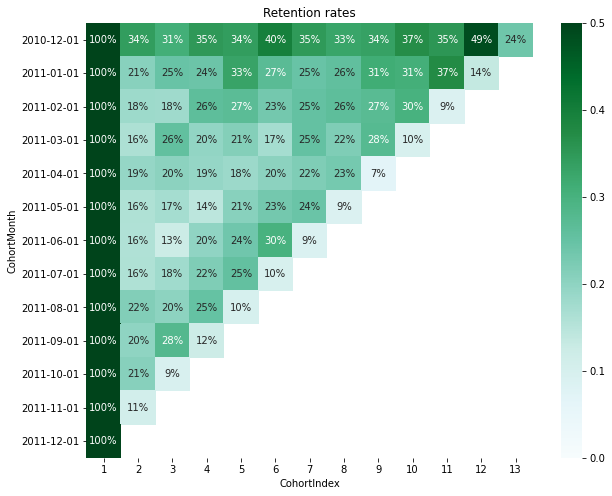

In [33]:
# modify the CohortIndex
retention.index = retention.index.strftime('%Y-%m-%d')

# show in heatmap

plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

**RFM analysis**

Step 1
- create a hypothetical snapshot_day data as if we're doing analysis recently


In [37]:
# create a hypothetical snapshot_day data

snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:49:00')

Step 2
- calculate RFM metrics

In [41]:
# create a column of 'TotalSum'

online['TotalSum'] = online['Quantity'] * online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,17.85


In [42]:
# Aggregate data on a customer level

datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

# Check the first rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


Step 3
- calculate quartile value for each column and name in 'R', 'F', 'M'



In [46]:
# Recency quartile

r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)


# Frequency quartile
f_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
datamart = datamart.assign(F = f_quartiles.values)


# Monetary quartile
m_labels = range(1,5)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(M = m_quartiles.values)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


Step 4
- build RFM segment and RFM score


In [49]:
# set a function to transform RFM quartile into string and combine as name of 'RFM_segment'
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12
12748,1,967,7522.06,4,4,4,444,12
12749,4,37,813.45,4,4,4,444,12
12820,3,17,268.02,4,3,3,433,10
12822,71,9,146.15,2,2,3,223,7


Step 5
- Analyzing RFM segments

In [50]:
# find the TOP 10 largest RFM segments

datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    382
111    346
211    168
344    162
233    132
222    130
311    120
433    119
333    118
122    116
dtype: int64

In [51]:
# Scenario - find RFM segment "111" and view top 5 records

datamart[datamart['RFM_Segment']=='111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,173,2,10.55,1,1,1,111,3
12852,295,2,32.55,1,1,1,111,3
12902,265,4,42.03,1,1,1,111,3
12922,161,4,57.24,1,1,1,111,3
12929,312,3,42.90,1,1,1,111,3


In [55]:
# Summary metrics per RFM score

datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           256.7       2.0          28.5   346
4           175.7       3.2          48.0   348
5           145.3       4.3          79.6   406
6           105.4       6.4         149.4   433
7            82.8       8.9         163.1   384
8            63.4      12.8         198.6   382
9            48.4      16.8         330.0   347
10           32.9      24.5         438.8   364
11           21.6      38.8         709.4   309
12            7.6      77.3        1709.0   382

Step 6
- label the segment with priority based on domain knowledge

In [56]:
# set a function to label the segment given the criteria
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Tier_1'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Tier_2'
    else:
        return 'Tier_3'

    
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Tier_1             27.4      40.1         817.6  1402
Tier_2            100.1       8.0         146.7  1605
Tier_3            216.1       2.6          38.3   694

**K-Means Clustering**

Step 1
- Preprocessing the RFM data

In [60]:
# subset the data with only RFM's columns

datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [62]:
# check for any skewed variables

datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069
std,99.974969,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,151.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


C:\Users\Fenix\anaconda3\envs\econ7970\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fenix\anaconda3\envs\econ7970\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fenix\anaconda3\envs\econ7970\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

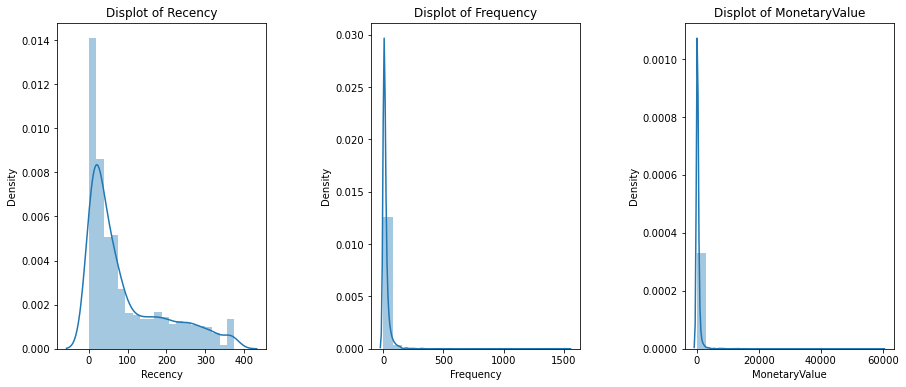

In [63]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Recency', 'Frequency', 'MonetaryValue']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(datamart_rfm[x], bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

In [67]:
# normalise the RFM with different mean

datamart_log = np.log(datamart_rfm)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)

# normalise manually
# 1. Center the data by subtracting average values from each entry
# data_centered = data - data.mean()

# 2. Scale the data by dividing each entry by standard deviation
# data_scaled = data / data.std()

# 3. Normalize the data by applying both centering and scaling
# data_normalized = (data - data.mean()) / data.std()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Step 2
- initialize K-means & find optimum number of cluster of KMean (Elbow criterion method)

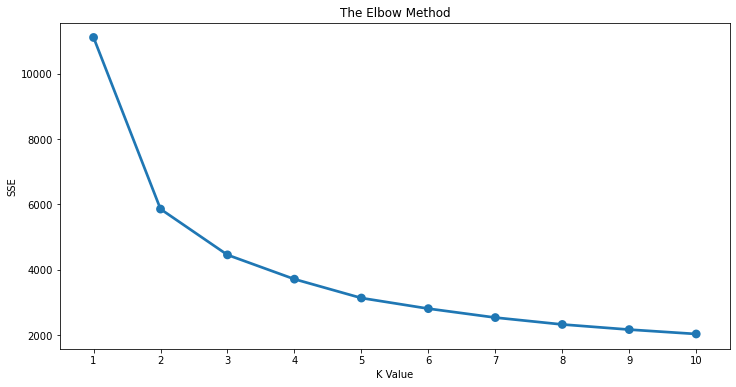

In [77]:
# initialise K-means & find optimum clusters via Elbow method

from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center


# Plot SSE for each *k*
plt.figure(figsize=(12,6))
plt.title('The Elbow Method')
plt.xlabel('K Value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [79]:
kmeans = KMeans(n_clusters = 4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

cluster_labels = kmeans.labels_
cluster_labels

array([3, 3, 3, ..., 1, 3, 0])

- analyzing average RFM values of each cluster

In [80]:
# Create a cluster label column in the original DataFrame
datamart_rfm_k4 = datamart_rfm.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
datamart_rfm_k4.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         130.0      13.1         254.2  1099
1          19.6      10.5         140.2   752
2         172.4       2.8          46.6  1028
3          17.3      55.6        1187.0   822

In [81]:
datamart_rfm_k4

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,2,27,992.82,3
12748,1,967,7522.06,3
12749,4,37,813.45,3
12820,3,17,268.02,3
12822,71,9,146.15,0
...,...,...,...,...
18280,278,2,38.70,2
18281,181,2,31.80,2
18282,8,2,30.70,1


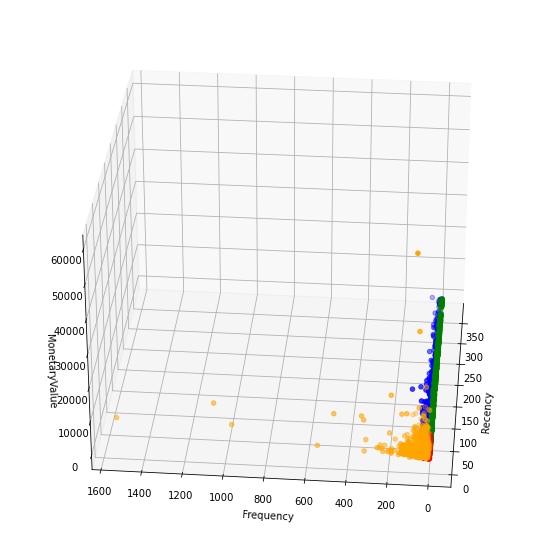

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datamart_rfm_k4.Recency[datamart_rfm_k4.Cluster == 0], 
           datamart_rfm_k4['Frequency'][datamart_rfm_k4.Cluster == 0], 
           datamart_rfm_k4['MonetaryValue'][datamart_rfm_k4.Cluster == 0], c ='blue')
ax.scatter(datamart_rfm_k4.Recency[datamart_rfm_k4.Cluster == 1], 
           datamart_rfm_k4['Frequency'][datamart_rfm_k4.Cluster == 1], 
           datamart_rfm_k4['MonetaryValue'][datamart_rfm_k4.Cluster == 1], c ='red')
ax.scatter(datamart_rfm_k4.Recency[datamart_rfm_k4.Cluster == 2], 
           datamart_rfm_k4['Frequency'][datamart_rfm_k4.Cluster == 2], 
           datamart_rfm_k4['MonetaryValue'][datamart_rfm_k4.Cluster == 2], c ='green')
ax.scatter(datamart_rfm_k4.Recency[datamart_rfm_k4.Cluster == 3], 
           datamart_rfm_k4['Frequency'][datamart_rfm_k4.Cluster == 3], 
           datamart_rfm_k4['MonetaryValue'][datamart_rfm_k4.Cluster == 3], c ='orange')
ax.scatter(datamart_rfm_k4.Recency[datamart_rfm_k4.Cluster == 4], 
           datamart_rfm_k4['Frequency'][datamart_rfm_k4.Cluster == 4], 
           datamart_rfm_k4['MonetaryValue'][datamart_rfm_k4.Cluster == 4], c ='purple')
ax.view_init(30, 185)

plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

plt.show()

- **Note:** The above plot on 'datamart_rfm_k4' does not provide clear picture.

In [83]:
# transform 'datamart_normalized' as DataFrame and add a 'Cluster' column

datamart_normalized = pd.DataFrame(datamart_normalized,
                                    index=datamart_rfm.index,
                                    columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k4['Cluster']
datamart_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,3
12748,-2.684553,3.845050,3.022433,3
12749,-1.706731,1.168000,1.331390,3
12820,-1.909647,0.530005,0.487337,3
12822,0.322128,0.008268,0.026297,0
...,...,...,...,...
18280,1.284889,-1.225610,-0.983925,2
18281,0.982207,-1.225610,-1.133219,2
18282,-1.217819,-1.225610,-1.159983,1


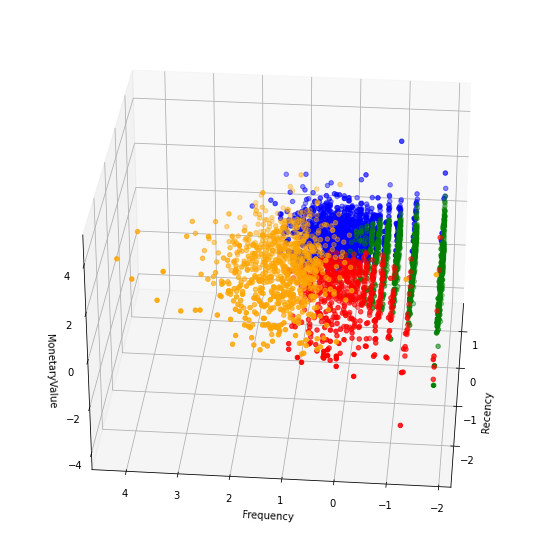

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 0], 
           datamart_normalized['Frequency'][datamart_normalized.Cluster == 0], 
           datamart_normalized['MonetaryValue'][datamart_normalized.Cluster == 0], c ='blue')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 1], 
           datamart_normalized['Frequency'][datamart_normalized.Cluster == 1], 
           datamart_normalized['MonetaryValue'][datamart_normalized.Cluster == 1], c ='red')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 2], 
           datamart_normalized['Frequency'][datamart_normalized.Cluster == 2], 
           datamart_normalized['MonetaryValue'][datamart_normalized.Cluster == 2], c ='green')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 3], 
           datamart_normalized['Frequency'][datamart_normalized.Cluster == 3], 
           datamart_normalized['MonetaryValue'][datamart_normalized.Cluster == 3], c ='orange')
ax.scatter(datamart_normalized.Recency[datamart_normalized.Cluster == 4], 
           datamart_normalized['Frequency'][datamart_normalized.Cluster == 4], 
           datamart_normalized['MonetaryValue'][datamart_normalized.Cluster == 4], c ='purple')
ax.view_init(30, 185)

plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

plt.show()

- **Note:** The above plot on 'datamart_normalized' does not provide clear picture.

In [85]:
# Melt the data into a long format so RFM values and metric names are stored in 1 column each

datamart_melt = pd.melt(datamart_normalized.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

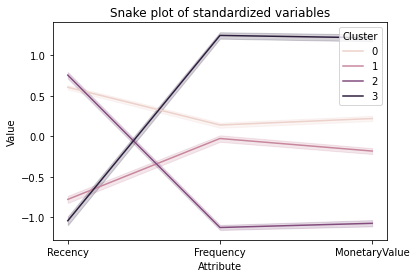

In [86]:
# visualise in a snake plot

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)

Step 3

- find relative importance of segment attributes

    - Useful technique to identify relative importance of each segment's attribute
    - Calculate average values of each cluster
    - Calculate average values of population
    - Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

In [89]:
# build relative important table
# (a ratio moves aways from 0, attribute important (relative to total pop.) increases)

cluster_avg = datamart_rfm_k4.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg / population_avg - 1

relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.38,-0.31,-0.33
1,-0.79,-0.45,-0.63
2,0.83,-0.86,-0.88
3,-0.82,1.90,2.12


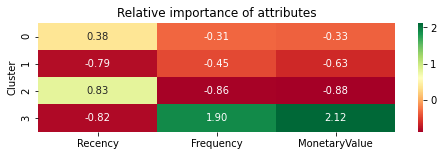

In [90]:
# plot heatmap

plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

#### Insights of this dataset:


**Finding 1:**
- Cluster = 0: Frequency and MonetaryValue are important.
- Cluster = 1: Recency is most important, MonetaryValue is the second.
- Cluster = 2: Frequency and MonetaryValue are both important.
- Cluster = 3: Recency and MonetaryValue are both important.

**Finding 2:**

For Recency:

CustomerID from the Cluster 1 & 3 are more important.

For Frequency:

CustomerID from the Cluster 2 & 3 are more important.

For MonetaryValue:

CustomerID from the Cluster 2 & 3 are more important.

